In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

'''
raw_note = pd.read_csv('./route_note.csv')#读取所有游记的具体内容
raw_note = raw_note.rename(columns={'link':'链接'})#重命名'link'列为'链接'列方便做join连接

raw_basic_shanghai = pd.read_csv('./qunar_data.csv')#读取上海地区的数据
raw_basic_nanjing = pd.read_csv('./qunar_data_nanjing.csv')#读取南京地区的数据
raw_basic_hangzhou = pd.read_csv('./qunar_data_hangzhou.csv')#读取杭州地区的数据

#增加area列加以区分
raw_basic_shanghai['area'] = 'shanghai'
raw_basic_nanjing['area'] = 'nanjing'
raw_basic_hangzhou['area'] = 'hangzhou'

raw_basic = pd.concat([raw_basic_shanghai,raw_basic_hangzhou,raw_basic_nanjing])#将数据整合

#merged_data = pd.read_csv('./merged_data.csv',encoding='utf-8')
merged_data = pd.merge(raw_basic,raw_note,on=['链接'])

merged_data['content_count'] = merged_data['note_text'].str.len()#原始文本长度
'''

"\nraw_note = pd.read_csv('./route_note.csv')#读取所有游记的具体内容\nraw_note = raw_note.rename(columns={'link':'链接'})#重命名'link'列为'链接'列方便做join连接\n\nraw_basic_shanghai = pd.read_csv('./qunar_data.csv')#读取上海地区的数据\nraw_basic_nanjing = pd.read_csv('./qunar_data_nanjing.csv')#读取南京地区的数据\nraw_basic_hangzhou = pd.read_csv('./qunar_data_hangzhou.csv')#读取杭州地区的数据\n\n#增加area列加以区分\nraw_basic_shanghai['area'] = 'shanghai'\nraw_basic_nanjing['area'] = 'nanjing'\nraw_basic_hangzhou['area'] = 'hangzhou'\n\nraw_basic = pd.concat([raw_basic_shanghai,raw_basic_hangzhou,raw_basic_nanjing])#将数据整合\n\n#merged_data = pd.read_csv('./merged_data.csv',encoding='utf-8')\nmerged_data = pd.merge(raw_basic,raw_note,on=['链接'])\n\nmerged_data['content_count'] = merged_data['note_text'].str.len()#原始文本长度\n"

In [2]:
merged_data = pd.read_csv("qunar_data_merged.csv")  # 读取数据

In [166]:
merged_data=data_merged.dropna()  # 滤除缺失值

In [235]:
merged_data.head()

,Unnamed: 0,标题,链接,作者,出发日期,天数,照片数,人数,玩法,费用,阅读数,点赞数,评论数,地点
0,0,2016年厦门最新旅游攻略,https://travel.qunar.com/youji/6192339,大秉儿,2016-01-18 出发,共3天,58张照片,独自一人,环游 购物 美食 海滨海岛,人均2500元,76.3万,4232,248,厦门
1,1,和我爱的人，在我爱的城——厦门亲子游【厦门本地人的干货攻略】,https://travel.qunar.com/youji/7586903,hello雯子,2019-03-25 出发,共5天,460张照片,亲子,深度游 环游 购物 美食 暑假 短途周末 夏季 摄影 探险,NaN,1.3万,33,1,厦门
2,2,在厦门体验慢生活,https://travel.qunar.com/youji/5686412,花落心间,2015-07-14 出发,共4天,180张照片,三五好友,环游 美食,人均3500元,46.1万,3300,178,厦门
3,3,【清新福建】东南最美海岛城市，一步之间皆是美景,https://travel.qunar.com/youji/7527889,山野幽居,2019-09-12 出发,共3天,223张照片,三五好友,深度游 美食 海滨海岛 中秋节 摄影,人均3000元,9007,14,4,厦门
4,4,“捣”“蛋”的厦囧愿望清单完成记,https://travel.qunar.com/youji/5891724,qunar用户,2014-01-26 出发,共5天,414张照片,情侣,环游 美食 骑行,人均2395元,15.4万,997,100,厦门


In [168]:
32036-16399

15637

In [94]:
sum(pd.to_numeric(merged_data["点赞数"])>20)

3831

In [202]:
def preprocess_num_read(str_readnum):
    '''
        处理'阅读数'列，
        若该样本含有“万”字，则转化成*10000的实际数值；
        若该样本为空，则转化成0；
        若该样本为具体数字，则转为int值。
    '''
    if str_readnum.find('万') != -1:
        str_readnum = str_readnum.replace('万','')
        str_readnum = float(str_readnum) * 1e4
    elif str_readnum == '' or str_readnum == np.NaN:
        str_readnum = 0
    else:
        str_readnum = int(str_readnum)
    return str_readnum

def preprocess_transfer_season(month):
    '''
        输入int型月份，输出对应季节，1为春2为夏3为秋4为冬
    '''
    if month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
    else:
        return 4

In [203]:
#阅读数处理
merged_data['read_num_transformed'] = merged_data['阅读数'].apply(preprocess_num_read)

#费用处理
merged_data['per_cost'] = merged_data['费用'].str.replace('人均','')
merged_data['per_cost'] = merged_data['per_cost'].str.replace('元','')
merged_data['per_cost'] = merged_data['per_cost'].fillna(-1)

#天数
merged_data['travel_days'] = merged_data['天数'].str.replace('共','')
merged_data['travel_days'] = merged_data['travel_days'].str.replace('天','')
merged_data['travel_days'] = merged_data['travel_days'].fillna(-1)

#照片数
merged_data['photo_num'] = merged_data['照片数'].str.replace('张照片','')
merged_data['photo_num'] = merged_data['photo_num'].str.replace('没有照片','0')
merged_data['photo_num'] = merged_data['photo_num'].fillna(-1)

#玩法
merged_data['玩法_list'] = merged_data['玩法'].str.split('\xa0')
notna_row = merged_data['玩法_list'].notna()#非空的行
use_row = merged_data['玩法_list'][notna_row]
playmode_list = use_row.tolist()
playmode_list = set(sum(playmode_list,[]))#展开成一个列表并去重
playmode_list = list(playmode_list)
playmode_list.sort()#排序
#生成新的列
for each_col in playmode_list:
    merged_data[each_col] = merged_data['玩法_list'].apply(lambda x: 0 if (type(x)==float or (each_col not in x)) else 1)#nan的可以用type==float来确定
merged_data = merged_data.rename(columns=dict(zip(playmode_list,['playmode_'+each for each in playmode_list])))#特征名重命名，添加前缀person_num

#人数
person_num_list = set(merged_data['人数'].tolist())
person_num_list.remove(np.nan)#空值不做列
person_num_list = list(person_num_list)
person_num_list.sort()#排序
#new_person_num_list = ['person_num_'+each for each in person_num_list]#特征名加前缀，方便识别
#生成新的列
for each_col in person_num_list:
    merged_data[each_col] = merged_data['人数'].apply(lambda x: 1 if x == each_col else 0)
merged_data = merged_data.rename(columns=dict(zip(person_num_list,['person_num_'+each for each in person_num_list])))#特征名重命名，添加前缀person_num

#出发日期
merged_data['date'] = merged_data['出发日期'].str.replace(' 出发','')
merged_data['date'] = pd.to_datetime(merged_data['date'], format = '%Y-%m-%d')#日期格式转化
merged_data['dayofweek'] = merged_data['date'].dt.weekday#周一二三四五六日分别对应0-6
merged_data['is_weekend'] = merged_data['dayofweek'].apply(lambda x: 1 if x in [5,6] else 0)
merged_data['month'] = merged_data['date'].dt.month
merged_data['season'] = merged_data['month'].apply(preprocess_transfer_season)#加入季节，1春2夏3秋4冬

In [204]:
merged_data.to_csv("qunar_merged_preprocess1.csv",index=False)

In [3]:
merged_data=pd.read_csv("qunar_merged_preprocess1.csv")

In [83]:
merged_data=merged_data.dropna()  # 滤除缺失值

In [84]:
sum((pd.to_numeric(merged_data["travel_days"])>=10)|(pd.to_numeric(merged_data["per_cost"])<100))

2033

In [70]:
pd.to_numeric(merged_data.travel_days).quantile(0.9)

9.0

In [4]:
merged_data=merged_data.dropna()  # 滤除缺失值
merged_data=merged_data[pd.to_numeric(merged_data["travel_days"])<10]  # 滤除游玩天数多于10天的数据
merged_data=merged_data[pd.to_numeric(merged_data["per_cost"])>100]  # 滤除人均费用比100元少的数据

In [5]:
merged_data.loc[:,"title_length"]=merged_data["标题"].apply(lambda x: len(x))

In [6]:
merged_data=merged_data.reset_index().drop(["index","Unnamed: 0","date"],axis=1)

In [7]:
drop_col=['标题', '链接', '作者', '出发日期', '天数', '照片数', '人数', '玩法', '费用', '阅读数',
          '评论数','玩法_list']
merged_data2=merged_data.drop(drop_col,axis=1)

In [8]:
# 将点赞数转化为分类变量
merged_data2.loc[merged_data2[pd.to_numeric(merged_data2["点赞数"])>20].index,"z"]=1
merged_data2.loc[merged_data2[pd.to_numeric(merged_data2["点赞数"])<=20].index,"z"]=0

In [9]:
merged_data2=merged_data2.drop("点赞数",axis=1)

In [12]:
merged_data2.to_csv("classification_all_data.csv",index=False)

In [230]:
merge_data=merged_data2[(merged_data2["read_num_transformed"]>=8000)&(merged_data2["read_num_transformed"]<12500)]

In [231]:
merge_data.to_csv("classification_data1.csv",index=False)

In [11]:
merged_data2["z"].describe()

count    14020.000000
mean         0.231669
std          0.421914
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: z, dtype: float64

In [114]:
# 选取四个月内的数据，减少发布时间对阅读数的正向影响
date=pd.to_datetime(merged_data["date"]).apply(lambda x:x.strftime("%Y-%m"))
date_list = sorted(list(set(date)))
count_by_date = [sum(date==date1) for date1 in date_list]
start_date = pd.Series(date_list,index=count_by_date).sort_index(ascending=False).iloc[1]
print(start_date)
merge_data1 = merged_data[(date=="2015-07")|(date=="2015-08")|(date=="2015-09")|(date=="2015-10")]

2015-08


In [115]:
merge_data1.loc[:,"like_num"] = merge_data1["点赞数"]
merge_data1.loc[:,"comment_num"] = merge_data1["评论数"]
drop_col=['标题', '链接', '作者', '出发日期', '天数', '照片数', '人数', '玩法', '费用', '阅读数','点赞数',
          '评论数','玩法_list']
merge_data=merge_data1.drop(drop_col,axis=1)

d:\quant\vnpy\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
d:\quant\vnpy\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [173]:
sum((merged_data2["read_num_transformed"]<11500)&(merged_data2["read_num_transformed"]>=7500))

1223

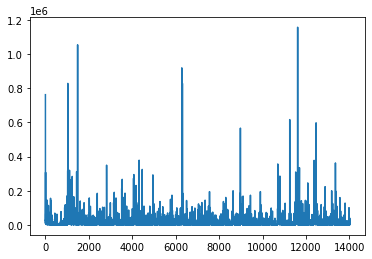

In [144]:
plt.plot(merged_data2["read_num_transformed"])

<AxesSubplot:>

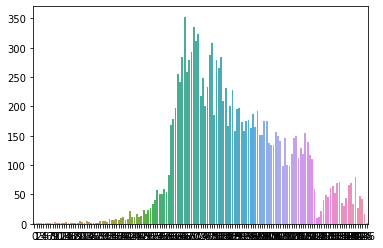

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=list(range(len(count_by_date))),y=count_by_date)

In [118]:
merge_data=merge_data.reset_index().drop(["index","Unnamed: 0","date"],axis=1)

In [119]:
merge_data

,地点,read_num_transformed,per_cost,travel_days,photo_num,playmode_万圣节,playmode_中秋节,playmode_五一,playmode_人文,playmode_冬季,...,person_num_情侣,person_num_独自一人,person_num_闺蜜,dayofweek,is_weekend,month,season,title_length,like_num,comment_num
0,厦门,461000.0,3500,4,180,0,0,0,0,0,...,0,0,0,1,0,7,2,8,3300,178
1,厦门,31000.0,2000,4,506,0,0,0,0,0,...,0,0,0,2,0,8,2,11,81,15
2,厦门,35000.0,3000,7,215,0,0,0,0,0,...,0,0,0,0,0,10,3,11,67,50
3,厦门,11000.0,3000,4,140,0,0,0,0,0,...,0,0,0,2,0,7,2,15,79,18
4,厦门,19000.0,3500,5,105,0,0,0,0,0,...,0,0,0,2,0,7,2,19,133,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,芜湖,15000.0,200,1,12,0,0,0,0,0,...,0,0,0,6,1,7,2,19,33,1
1259,芜湖,9595.0,350,1,17,0,0,0,0,0,...,0,1,0,6,1,7,2,13,27,5
1260,芜湖,4461.0,800,3,14,0,0,0,0,0,...,1,0,0,0,0,10,3,20,2,0
1261,芜湖,2277.0,1000,2,2,0,0,0,0,0,...,0,0,0,0,0,10,3,16,3,0


In [120]:
merge_data.to_csv('regression_data1.csv',index=False)

In [236]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

merged_data=pd.read_csv("qunar_merged_preprocess1.csv")  # 读取数据
merged_data=merged_data.dropna()  # 滤除缺失值
merged_data=merged_data[pd.to_numeric(merged_data["travel_days"])<10]  
# 滤除游玩天数多于10天的数据
merged_data=merged_data[pd.to_numeric(merged_data["per_cost"])>100]  
# 滤除人均费用比100元少的数据
merged_data.loc[:,"title_length"]=merged_data["标题"].apply(lambda x: len(x))
# 添加标题长度变量

# 选取四个月内的数据，减少发布时间对阅读数的正向影响
date=pd.to_datetime(merged_data["date"]).apply(lambda x:x.strftime("%Y-%m"))
date_list = sorted(list(set(date)))
count_by_date = [sum(date==date1) for date1 in date_list]
start_date = pd.Series(date_list,index=count_by_date).sort_index(ascending=False).iloc[1]
print(start_date)
merge_data1 = merged_data[(date=="2015-07")|(date=="2015-08")|(date=="2015-09")|(date=="2015-10")]

drop_col=['标题', '链接', '作者', '出发日期', '天数', '照片数', '人数', '玩法', '费用', '阅读数', '点赞数', '评论数','玩法_list']
merge_data=merge_data1.drop(drop_col,axis=1)
merge_data=merge_data.reset_index().drop(["index","Unnamed: 0","date"],axis=1)
merge_data.to_csv('regression_data1.csv',index=False)

2015-08


playmode_美食 
 ['playmode_人文', 'playmode_古镇', 'playmode_国庆', 'playmode_夏季', 'playmode_徒步', 'playmode_摄影', 'playmode_暑假', 'playmode_毕业游', 'playmode_海滨海岛', 'playmode_深度游', 'playmode_温泉', 'playmode_游轮', 'playmode_漫游', 'playmode_环游', 'playmode_短途周末', 'playmode_穷游', 'playmode_第一次', 'playmode_自驾', 'playmode_蜜月', 'playmode_购物', 'playmode_赏秋', 'playmode_骑行']


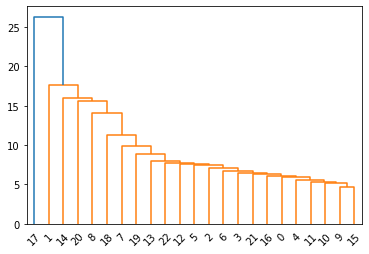

In [237]:
# 先运行上面的部分，再运行下面的代码
data = pd.read_csv("regression_data1.csv")
# 给playmode系列变量降维
df1 = data.iloc[:,5:46]
df2 = pd.DataFrame(df1.values.T, index=df1.columns, columns=df1.index)  # 转置数据
df1.sum().describe()
df2=df2[df1.sum()>10]  # 玩法频率太低不具有代表性，应剔除
z = linkage(df2,method="average",metric='euclidean')  # 层次聚类
dendrogram(z)  # 层次聚类树状图
index = list(df2.index)
set1 = index[17]
set2 = index 
set2.pop(17)
print(set1,"\n",set2)

data.loc[:,"playmode1"]=data["playmode_美食"]
df3=df2.drop(df2.index[17])
data.loc[df1[df3.sum()>0].index,"playmode2"]=1
data.loc[df1[df3.sum()==0].index,"playmode2"]=0 
# 只要有第二类中的玩法则为1，否则为0
data=data.drop(df1.columns,axis=1)
data=data.drop(["month","season","dayofweek","person_num_学生","地点"],axis=1)
data.to_csv("regression.csv",index=False)

In [238]:
data.shape

(1263, 14)